# CNN para reconhecimento de imagens
## Dataset Dogs & Cats - Kaggle
*Cleuton Sampaio*

[Dataset Dogs & cats]()

In [84]:
import keras 
import keras.backend as K
import os, random
from keras.layers import Dense, Conv2D, Input, MaxPooling2D, Flatten, Dropout
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.callbacks import ModelCheckpoint
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm
import cv2 
from keras.preprocessing import image
%matplotlib inline

In [85]:
batch_sz = 64 # Batch size
nb_class = 2  # Número de classes
nb_epochs = 10 # Número de epochs de treinamento
img_h, img_w = 64, 64 # Altura e largura das imagens
dir_treino = './dogscats/train/'
dir_teste = './dogscats/test/'

# Preparar arquivos de imagens

In [91]:
def ler_imagem(file):
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imres = cv2.resize(gray, (img_h, img_w), interpolation=cv2.INTER_CUBIC)
    imres = image.img_to_array(imres.T)
    imres = np.expand_dims(imres, axis = 0)    
    return imres

In [92]:
def gerar_dataset(filenames):
    rotulos = []
    dataset = np.ndarray((len(filenames), img_h, img_w, 1), dtype=np.uint8)
    x = 0
    for arquivo in filenames:
        dataset[x] = ler_imagem(arquivo)
        if '/cat.' in arquivo: 
            rotulos.append(0)
        else:
            rotulos.append(1)
        x = x + 1
        if x%1000==0:
            print("Processados ",x)
    return dataset, rotulos

imagens_treino = [dir_treino+i for i in os.listdir(dir_treino) if '.jpg' in i]
random.shuffle(imagens_treino)
imagens_teste  = [dir_teste+i for i in os.listdir(dir_teste) if '.jpg' in i]
x_treino, y_treino = gerar_dataset(imagens_treino)
x_teste, y_teste  = gerar_dataset(imagens_teste)

Processados  1000
Processados  2000
Processados  3000
Processados  4000
Processados  5000
Processados  6000
Processados  7000
Processados  8000
Processados  9000
Processados  10000
Processados  11000
Processados  12000
Processados  13000
Processados  14000
Processados  15000
Processados  16000
Processados  17000
Processados  18000
Processados  19000
Processados  20000
Processados  21000
Processados  22000
Processados  23000
Processados  24000
Processados  25000


In [93]:
im = ler_imagem(imagens_treino[0])
print(im.shape)

(1, 64, 64, 1)


In [94]:
def conv3x3(input_x,nb_filters):
    # Prepara a camada convolucional
    return Conv2D(nb_filters, kernel_size=(3,3), use_bias=False,
               activation='relu', padding="same")(input_x)

Train on 25000 samples, validate on 30 samples
Epoch 1/10
25000/25000 [==============================] - 620s 25ms/step - loss: 0.6499 - acc: 0.6105 - val_loss: 0.5821 - val_acc: 0.6000
Epoch 2/10
25000/25000 [==============================] - 787s 31ms/step - loss: 0.4946 - acc: 0.7598 - val_loss: 0.3507 - val_acc: 0.8333
Epoch 3/10
25000/25000 [==============================] - 985s 39ms/step - loss: 0.3940 - acc: 0.8217 - val_loss: 0.2028 - val_acc: 0.9000
Epoch 4/10
25000/25000 [==============================] - 616s 25ms/step - loss: 0.3208 - acc: 0.8603 - val_loss: 0.1899 - val_acc: 0.9000
Epoch 5/10
25000/25000 [==============================] - 615s 25ms/step - loss: 0.2589 - acc: 0.8884 - val_loss: 0.1011 - val_acc: 0.9667
Epoch 6/10
25000/25000 [==============================] - 608s 24ms/step - loss: 0.2085 - acc: 0.9136 - val_loss: 0.1021 - val_acc: 0.9667
Epoch 7/10
25000/25000 [==============================] - 611s 24ms/step - loss: 0.1559 - acc: 0.9376 - val_loss: 0.098

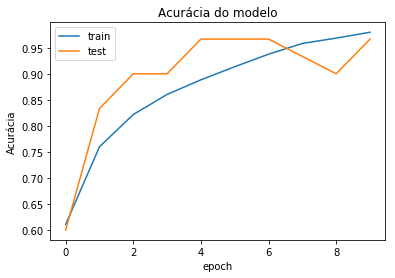

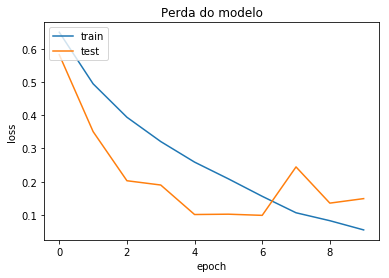

In [95]:

# Normaliza os valores dos pixels
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')
x_treino /= 255.0
x_teste /= 255.0

# Converte os rótulos para "One-hot encoding": 
y_treino = keras.utils.to_categorical(y_treino, nb_class)
y_teste = keras.utils.to_categorical(y_teste, nb_class)

# Cria o modelo executando um treino e avaliação:
inputs = Input(shape=(img_h, img_w, 1))
x = conv3x3(inputs, 32)
x = conv3x3(x, 32)
x = MaxPooling2D(pool_size=(2,2))(x) 
x = conv3x3(x, 64)
x = conv3x3(x, 64)
x = MaxPooling2D(pool_size=(2,2))(x) 
x = conv3x3(x, 128)
x = MaxPooling2D(pool_size=(2,2))(x) 
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
preds = Dense(nb_class, activation='softmax')(x)
model = Model(inputs=inputs, outputs=preds)

# Compila o modelo: 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Cria um callback para salvar o modelo a cada "epoch" de treinamento completada: 
callback = ModelCheckpoint('dogs_cats_saved.h5')

# Treina o modelo (demora cerca de 6 minutos sem GPU):
history = model.fit(x_treino, y_treino,
          batch_size=batch_sz,
          epochs=nb_epochs,
          verbose=1,
          validation_data=(x_teste, y_teste), 
          callbacks=[callback])

# Avalia o modelo com dados de teste:
score = model.evaluate(x_teste, y_teste, verbose=0)
print('Perda:', score[0])
print('Acurácia:', score[1])

# Plota gráficos de perda e acurácia: 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()